# Proyecto 4

Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

Elige tu punto de partida entre dos opciones:
Tus Proyectos 01 y 02
Tu Proyecto 03
Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.
Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.
Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.
Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.
Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

Checklist de evaluación
Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.
Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.
Las preguntas que se respondan deben estar correctamente explicitadas.
Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.
Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.
Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

# Series de tiempo

Una serie temporal es un conjunto de muestras tomadas a intervalos de tiempo regulares. Es interesante analizar su comportamiento al mediano y largo plazo, intentando detectar patrones y poder hacer pronósticos de cómo será su comportamiento futuro. Lo que hace 'especial' a una Time Series a diferencia de un “problema” de Regresión son dos cosas:Es dependiente del Tiempo. Esto rompe con el requerimiento que tiene la regresión lineal de que sus observaciones sean independientes.Suelen tener algún tipo de estacionalidad, ó de tendencias a crecer ó decrecer.
(fuente: https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/).

En este proyecto vamos a continuar trabajando con la serie de tiempo del proyecto 3, pero vamos a agregar los datos del año 2020. En primer lugar vamos a explorar los datos de esta año para observar como la pandemia afectó el flujo vehicular y como esos datos pueden modificar el pronostico a futuro. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 


# graficos incrustados
%matplotlib inline

# pandas solo 4 decimales
pd.set_option('precision', 4)

## Datos

In [2]:
# En este punto cargamos los datasets con los datos 
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


### Exploración de Datos del 2020

In [24]:
#datos del 2020
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


Se observa que en dataset del 2020, contiene 13 columnas, a diferencia del 2019, quiere decir que fueron agregados 3 nuevos campos en la tabla: mes, observación y dia_fecha

In [25]:
print(data_2020['dia_fecha'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


In [26]:
print(data_2020['mes'].unique())

['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [27]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [28]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [29]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


<AxesSubplot:xlabel='tipo_vehiculo', ylabel='count'>

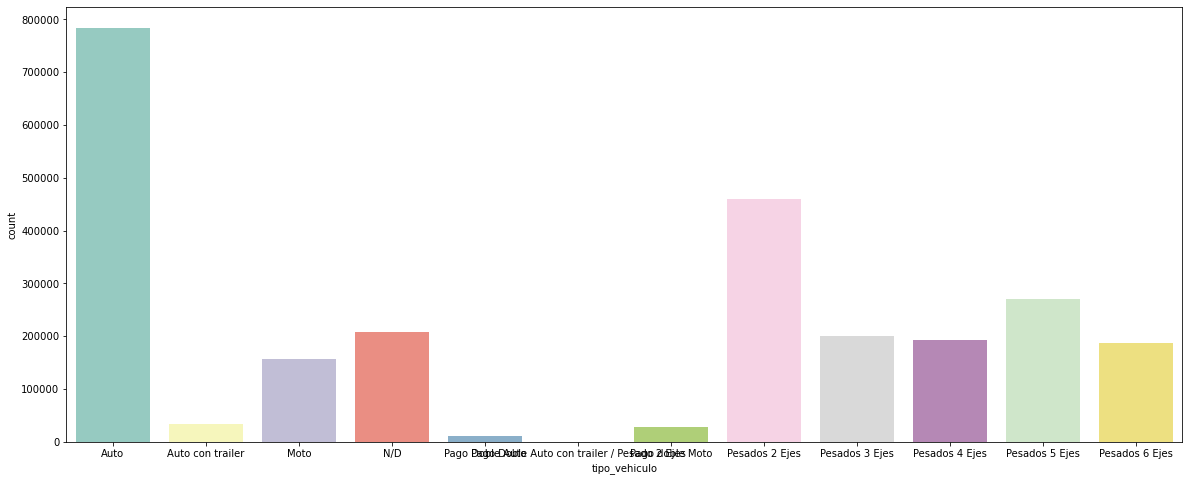

In [30]:
plt.figure(figsize = (20,8))
sns.countplot(data = data_2020, x = "tipo_vehiculo", palette="Set3")

En 2020, el atributo muestra diferentes categorias que los años anteriores.  

In [31]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


<AxesSubplot:xlabel='forma_pago', ylabel='count'>

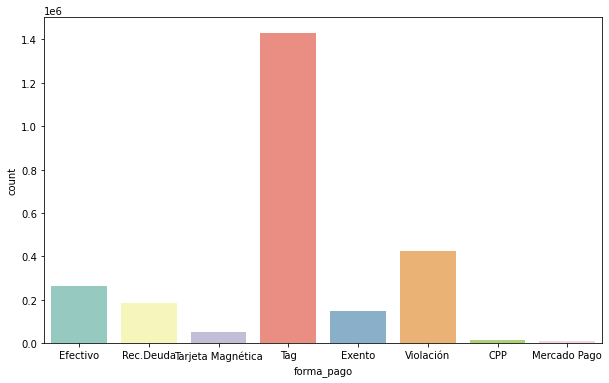

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(data = data_2020, x = "forma_pago", palette="Set3")

Se puede observar que la forma más popular en el 2020, fue con Tag. El tag es un dispositivo electrónico que  permite pasar por toda la red de autopistas y rutas nacionales del país sin detenerse en las barreras y sin usar efectivo.

<AxesSubplot:xlabel='sentido', ylabel='count'>

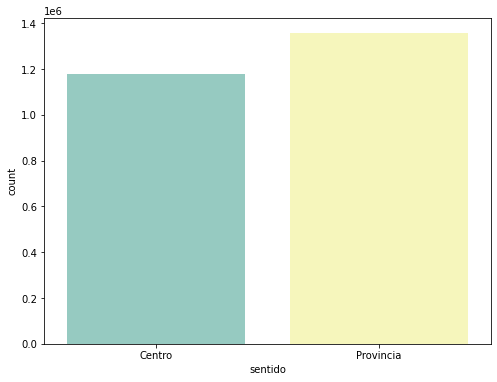

In [33]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_2020, x = "sentido", palette="Set3")

In [34]:
data_2020.cantidad_pasos.describe()

count    2.5337e+06
mean     3.4421e+01
std      1.3851e+02
min      9.9158e-01
25%      1.0000e+00
50%      4.0000e+00
75%      1.4000e+01
max      3.9098e+03
Name: cantidad_pasos, dtype: float64

En este punto se procede a convertir los datos al formato de los dataset anteriores. 

In [35]:
#convertimos la forma de pago a mayúsculas
data_2020['forma_pago_2'] = data_2020['forma_pago'].str.upper()

In [36]:
print(data_2020['forma_pago_2'].unique())

['EFECTIVO' 'REC.DEUDA' 'TARJETA MAGNÉTICA' 'TAG' 'EXENTO' 'VIOLACIÓN'
 'CPP' 'MERCADO PAGO']


In [37]:
#convertimos los datos de estación a capitalize (primera letra en mayúscula)
data_2020['estacion_2'] = data_2020['estacion'].str.capitalize()

In [38]:
print(data_2020['estacion_2'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane linierslepiane centro'
 'Dellepiane liniers' 'Illia' 'Ilp' 'Pb1' 'Pb3' 'Pb4' 'Retiro' 'Salguero'
 'Sarmiento' 'Pb2']


In [ ]:
# eliminamos las columnas que han sido modificadas  y renombramos las columnas editadas.

In [39]:
data_2020.drop(columns=['forma_pago','estacion'], axis= 1, inplace = True)

In [40]:
data_2020.rename(columns = {'forma_pago_2':'forma_pago'}, inplace = True) 

In [41]:
data_2020.rename(columns = {'estacion_2':'estacion'}, inplace = True) 

In [42]:
#datos listos para unir a los demas dataset
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Centro,24.0,EFECTIVO,Alberdi
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Provincia,80.0,EFECTIVO,Alberdi
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en Infracción,Provincia,1.0,REC.DEUDA,Alberdi
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en infracción con Multa LPR,Centro,1.0,REC.DEUDA,Alberdi
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en infracción con Multa LPR,Provincia,1.0,REC.DEUDA,Alberdi


### DATASET

In [43]:
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2020,data_2019, data_2018, data_2017])
dataset.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Centro,24.0,EFECTIVO,Alberdi
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Provincia,80.0,EFECTIVO,Alberdi
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en Infracción,Provincia,1.0,REC.DEUDA,Alberdi
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en infracción con Multa LPR,Centro,1.0,REC.DEUDA,Alberdi
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Paso en infracción con Multa LPR,Provincia,1.0,REC.DEUDA,Alberdi


## Estadistica descriptiva

In [44]:
dataset.cantidad_pasos.describe()

count    6.0944e+06
mean     7.5782e+01
std      2.6317e+02
min      9.9158e-01
25%      2.0000e+00
50%      6.0000e+00
75%      2.4000e+01
max      6.6770e+03
Name: cantidad_pasos, dtype: float64

In [45]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo 
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

dataset.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion
52,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Centro,326.0,EFECTIVO,Illia
53,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,Auto,Efectivo,Provincia,319.0,EFECTIVO,Illia
134,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,Auto,Efectivo,Centro,199.0,EFECTIVO,Illia
135,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,Auto,Efectivo,Provincia,180.0,EFECTIVO,Illia
202,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,3.0,Auto,Efectivo,Centro,114.0,EFECTIVO,Illia


In [46]:
dataset.shape

(291243, 13)

In [47]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,periodo,mes,dia,dia_fecha,hora_inicio,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion,fecha2
52,2020.0,enero,Miércoles,1.0,0.0,Auto,Efectivo,Centro,326.0,EFECTIVO,Illia,2020-01-01 01:00:00
53,2020.0,enero,Miércoles,1.0,0.0,Auto,Efectivo,Provincia,319.0,EFECTIVO,Illia,2020-01-01 01:00:00
134,2020.0,enero,Miércoles,1.0,1.0,Auto,Efectivo,Centro,199.0,EFECTIVO,Illia,2020-01-01 02:00:00
135,2020.0,enero,Miércoles,1.0,1.0,Auto,Efectivo,Provincia,180.0,EFECTIVO,Illia,2020-01-01 02:00:00
202,2020.0,enero,Miércoles,1.0,2.0,Auto,Efectivo,Centro,114.0,EFECTIVO,Illia,2020-01-01 03:00:00


In [48]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,periodo,mes,dia,dia_fecha,hora_inicio,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion,fecha
52,2020.0,enero,Miércoles,1.0,0.0,Auto,Efectivo,Centro,326.0,EFECTIVO,Illia,2020-01-01 01:00:00
53,2020.0,enero,Miércoles,1.0,0.0,Auto,Efectivo,Provincia,319.0,EFECTIVO,Illia,2020-01-01 01:00:00
134,2020.0,enero,Miércoles,1.0,1.0,Auto,Efectivo,Centro,199.0,EFECTIVO,Illia,2020-01-01 02:00:00
135,2020.0,enero,Miércoles,1.0,1.0,Auto,Efectivo,Provincia,180.0,EFECTIVO,Illia,2020-01-01 02:00:00
202,2020.0,enero,Miércoles,1.0,2.0,Auto,Efectivo,Centro,114.0,EFECTIVO,Illia,2020-01-01 03:00:00


In [49]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,periodo,mes,dia,dia_fecha,hora_inicio,tipo_vehiculo,observacion,sentido,cantidad_pasos,forma_pago,estacion,fecha
0,2017.0,NaN,Domingo,NaN,23.0,Pesado,NaN,Centro,1.0,EFECTIVO,Illia,2017-01-01 00:00:00
1,2017.0,NaN,Domingo,NaN,23.0,Pesado,NaN,Centro,21.0,EFECTIVO,Illia,2017-01-01 00:00:00
2,2017.0,NaN,Domingo,NaN,23.0,Pesado,NaN,Centro,10.0,EFECTIVO,Illia,2017-01-01 00:00:00
3,2017.0,NaN,Domingo,NaN,23.0,Pesado,NaN,Centro,1.0,EFECTIVO,Illia,2017-01-01 00:00:00
4,2017.0,NaN,Domingo,NaN,23.0,Liviano,NaN,Centro,857.0,EFECTIVO,Illia,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
291238,2020.0,diciembre,Jueves,31.0,19.0,Auto con trailer,Efectivo,Centro,1.0,EFECTIVO,Illia,2020-12-31 20:00:00
291239,2020.0,diciembre,Jueves,31.0,20.0,Auto,Efectivo,Provincia,106.0,EFECTIVO,Illia,2020-12-31 21:00:00
291240,2020.0,diciembre,Jueves,31.0,20.0,Auto,Efectivo,Centro,103.0,EFECTIVO,Illia,2020-12-31 21:00:00
291241,2020.0,diciembre,Jueves,31.0,20.0,Moto,Efectivo,Centro,5.0,EFECTIVO,Illia,2020-12-31 21:00:00


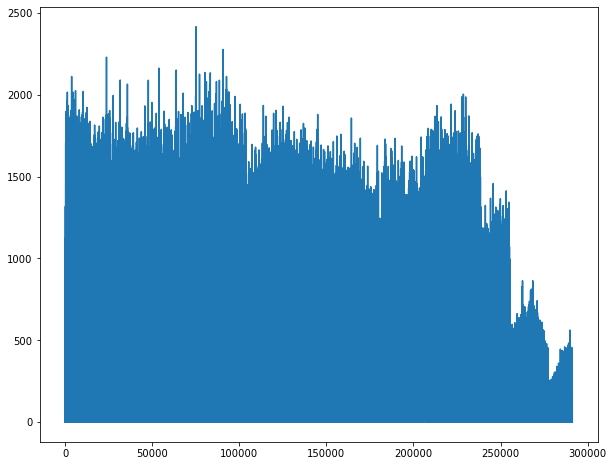

In [50]:
plot = dataset['cantidad_pasos'].plot(figsize=(10, 8))

In [51]:
dataset.isna().sum()

periodo                0
mes               238869
dia                    0
dia_fecha         238869
hora_inicio            0
tipo_vehiculo          0
observacion       238869
sentido                0
cantidad_pasos         0
forma_pago             0
estacion               0
fecha                  0
dtype: int64

Los valores nulos corresponden a los nuevos atributos que los años 2017, 2018 y 2019 no contienen.

In [52]:
##Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['observacion','forma_pago', 'estacion'], inplace = True)

In [53]:
dataset

,periodo,mes,dia,dia_fecha,hora_inicio,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,2017.0,NaN,Domingo,NaN,23.0,Pesado,Centro,1.0,2017-01-01 00:00:00
1,2017.0,NaN,Domingo,NaN,23.0,Pesado,Centro,21.0,2017-01-01 00:00:00
2,2017.0,NaN,Domingo,NaN,23.0,Pesado,Centro,10.0,2017-01-01 00:00:00
3,2017.0,NaN,Domingo,NaN,23.0,Pesado,Centro,1.0,2017-01-01 00:00:00
4,2017.0,NaN,Domingo,NaN,23.0,Liviano,Centro,857.0,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
291238,2020.0,diciembre,Jueves,31.0,19.0,Auto con trailer,Centro,1.0,2020-12-31 20:00:00
291239,2020.0,diciembre,Jueves,31.0,20.0,Auto,Provincia,106.0,2020-12-31 21:00:00
291240,2020.0,diciembre,Jueves,31.0,20.0,Auto,Centro,103.0,2020-12-31 21:00:00
291241,2020.0,diciembre,Jueves,31.0,20.0,Moto,Centro,5.0,2020-12-31 21:00:00


In [54]:
dataset.drop(columns = ['periodo'], inplace = True)

In [55]:
dataset.isna().sum()

mes               238869
dia                    0
dia_fecha         238869
hora_inicio            0
tipo_vehiculo          0
sentido                0
cantidad_pasos         0
fecha                  0
dtype: int64

DIARIO

In [56]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 3)


,dia_fecha,hora_inicio,cantidad_pasos
fecha,,,
2017-01-01,0.0,3033.0,31183.0
2017-01-02,0.0,3709.0,51568.0
2017-01-03,0.0,3602.0,51093.0
2017-01-04,0.0,3828.0,53332.0
2017-01-05,0.0,3790.0,56486.0


In [57]:
diario.cantidad_pasos.describe()

count     1461.0000
mean     36104.0164
std      16154.5831
min          0.0000
25%      31287.0000
50%      40530.0000
75%      47490.0000
max      63127.0000
Name: cantidad_pasos, dtype: float64

Desviacion estandar alta 

<AxesSubplot:xlabel='cantidad_pasos'>

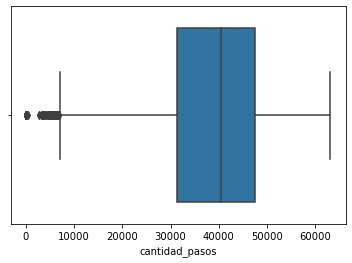

In [58]:
sns.boxplot(data = diario, x = "cantidad_pasos")

Aparecen los primeros valores anomalos, posiblemente corresponden a los datos del 2020, por estar por dabajo

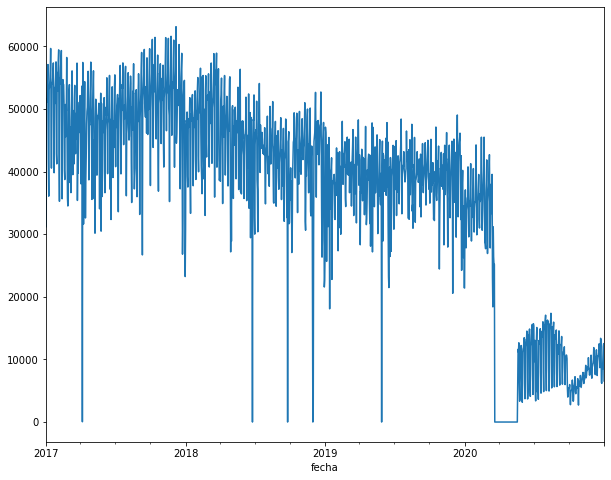

In [59]:
plot = diario['cantidad_pasos'].plot(figsize=(10, 8))

Aqui se puede observar claramente como los datos del año 2020 afectan la serie temporal, bajando bruscamente el flujo vehicular, a partir de marzo del año 2020.

In [60]:
diario.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='fecha', length=1461, freq='D')

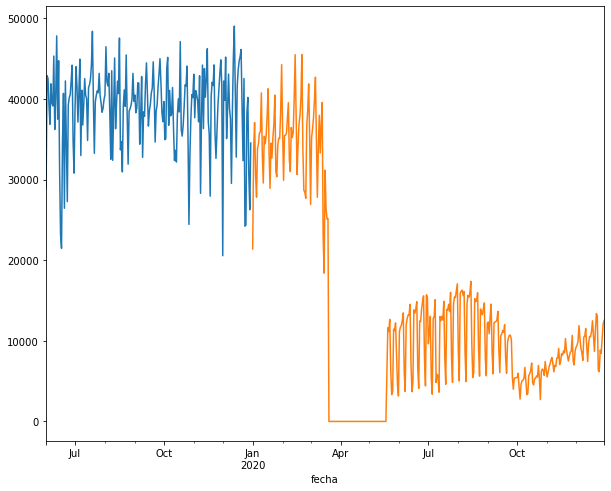

In [61]:
a_2019 = diario['2019-06-01':'2019-12-30']
plot = a_2019['cantidad_pasos'].plot(figsize=(10, 8)) #azul
a_2020 = diario['2020-01-01':'2020-12-30']
plot = a_2020['cantidad_pasos'].plot(figsize=(10, 8)) #naranja

En este grafico se observa cómo baja drasticamente el flujo vehicular. Para los meses de marzo a junio casi no existen pasos  de vehiculos, debido a la cuarentena estricta y a la forma de pago elegida(Efectivo), quiza existen algunos paso de vehiculos pero con otra forma de pago. Para el mes de junio aumenta el flujo vehicular, debido a que se levantaron algunas restricciones de circulación.

C:\Users\Daniela-Ezequiel\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


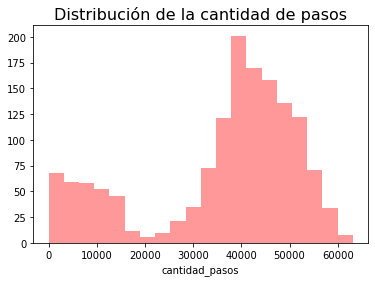

In [62]:
sns.distplot(diario['cantidad_pasos'], kde = False, color ='red', bins = 20)
plt.title('Distribución de la cantidad de pasos', fontsize=16)
plt.show()

Se observa en el grafico de distribución de la cantidad de pasos, dos distribuciones. Posiblemente una de la distribucion corresponde a los datos del 2020, que corresponden a valores bajos. 

Descomposición de la serie temporal

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='fecha'>

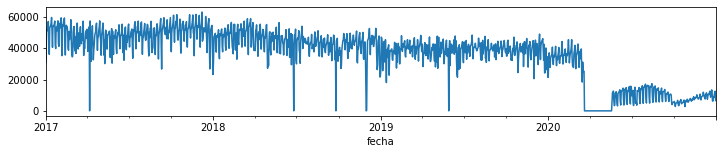

In [64]:
results = seasonal_decompose(diario['cantidad_pasos'])
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='fecha'>

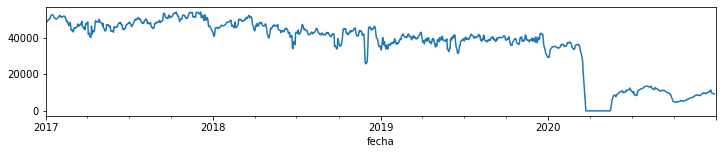

In [65]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='fecha'>

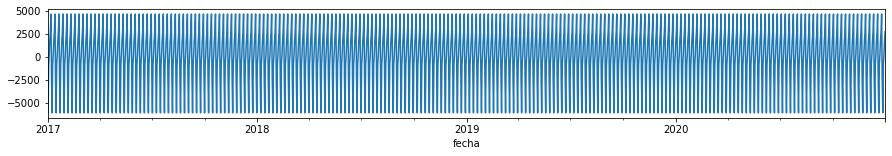

In [66]:
results.seasonal.plot(figsize=(15,2))

<AxesSubplot:xlabel='fecha'>

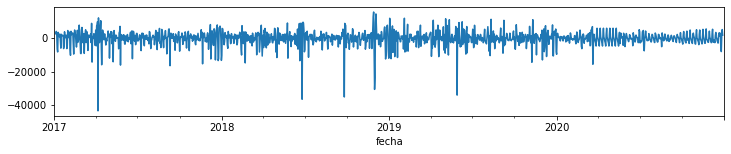

In [67]:
results.resid.plot(figsize=(12,2))

In [68]:
#Prueba ADF
from statsmodels.tsa.stattools import adfuller

In [69]:
est_adf = adfuller(diario['cantidad_pasos'].values, autolag='AIC')
print(f'ADF Statistic: {est_adf[0]}')
print(f'p-value: {est_adf[1]}')
for key, value in est_adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.8522653000616193
p-value: 0.8032856452447787
Critial Values:
   1%, -3.434899302257815
Critial Values:
   5%, -2.8635492080466607
Critial Values:
   10%, -2.567839687982253


Serie no estacionaria

Valores atipicos: En este punto se tomó la decisión de eliminar los datos atípicos

In [70]:
#valores atípicos
diario_1 = diario.cantidad_pasos.copy()
diario_1.describe()

count     1461.0000
mean     36104.0164
std      16154.5831
min          0.0000
25%      31287.0000
50%      40530.0000
75%      47490.0000
max      63127.0000
Name: cantidad_pasos, dtype: float64

In [71]:
limite = diario.cantidad_pasos.mean() + 3*diario.cantidad_pasos.std()
limite # limite superior

84567.76572677336

In [72]:
diario_1 = diario[diario.cantidad_pasos <= 20000]
diario_1

,dia_fecha,hora_inicio,cantidad_pasos
fecha,,,
2017-04-06,0.0,0.0,40.0
2018-06-25,0.0,0.0,0.0
2018-09-25,0.0,0.0,0.0
2018-11-29,0.0,1678.0,19728.0
2018-11-30,0.0,0.0,0.0
...,...,...,...
2020-12-27,4158.0,1815.0,8434.0
2020-12-28,4256.0,1775.0,10311.0
2020-12-29,4959.0,2057.0,12036.0


Se selecciona como valor 20000 de acuerdo al grafico de distribución de la cantidad de pasos,se observa que por debajo de este valor se encuentra 

Se procedede a eliminar los 296 valores atipicos

In [73]:
diario_2 = diario[diario.cantidad_pasos >= 20000]
diario_2

,dia_fecha,hora_inicio,cantidad_pasos
fecha,,,
2017-01-01,0.0,3033.0,31183.0
2017-01-02,0.0,3709.0,51568.0
2017-01-03,0.0,3602.0,51093.0
2017-01-04,0.0,3828.0,53332.0
2017-01-05,0.0,3790.0,56486.0
...,...,...,...
2020-03-14,2632.0,2253.0,23052.0
2020-03-16,3136.0,2273.0,31168.0
2020-03-17,3247.0,2271.0,26407.0


In [74]:
diario_2.drop(['dia_fecha','hora_inicio'], axis=1)

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-03-14,23052.0
2020-03-16,31168.0
2020-03-17,26407.0


In [75]:
diario_2.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19'],
              dtype='datetime64[ns]', name='fecha', length=1165, freq=None)

C:\Users\Daniela-Ezequiel\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


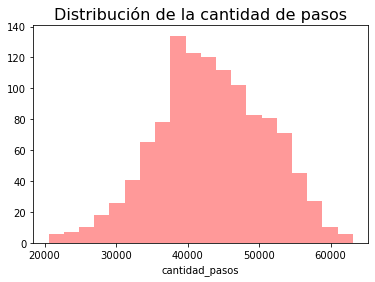

In [76]:
sns.distplot(diario_2['cantidad_pasos'], kde = False, color ='red', bins = 20)
plt.title('Distribución de la cantidad de pasos', fontsize=16)
plt.show()

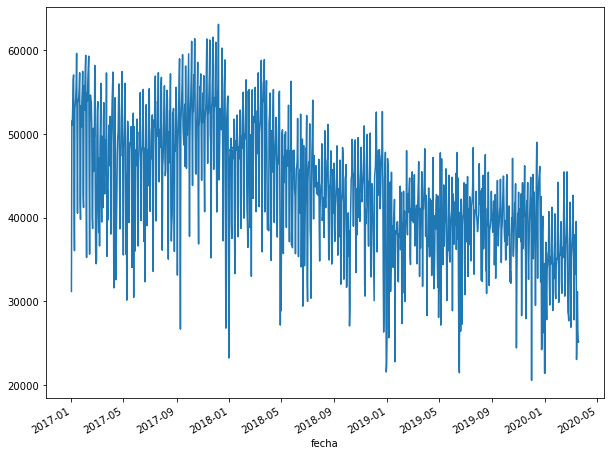

In [77]:
plot = diario_2['cantidad_pasos'].plot(figsize=(10, 8))

In [78]:
descomposicion_diaria_2 = sm.tsa.seasonal_decompose(diario_2['cantidad_pasos'],
                                                 model='additive', freq=180) 

<ipython-input-78-43c3cf4b8d0c>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descomposicion_diaria_2 = sm.tsa.seasonal_decompose(diario_2['cantidad_pasos'],


<AxesSubplot:xlabel='fecha'>

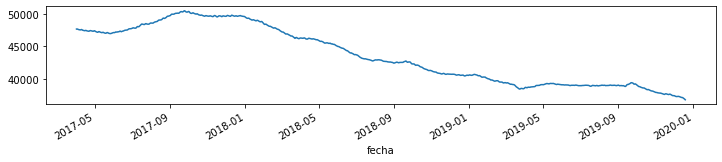

In [79]:
descomposicion_diaria_2.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='fecha'>

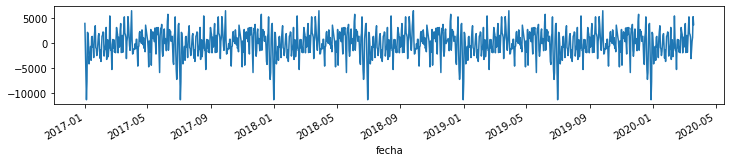

In [80]:
descomposicion_diaria_2.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='fecha'>

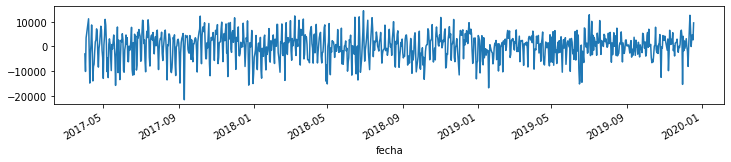

In [81]:
descomposicion_diaria_2.resid.plot(figsize=(12,2))

In [82]:
est_adf_2 = adfuller(diario_2['cantidad_pasos'].values, autolag='AIC')
print(f'ADF Statistic: {est_adf_2[0]}')
print(f'p-value: {est_adf_2[1]}')
for key, value in est_adf_2[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5657483556334741
p-value: 0.5007726922604335
Critial Values:
   1%, -3.436089106551049
Critial Values:
   5%, -2.864074184091338
Critial Values:
   10%, -2.568119264202968


La estadística ADF está lejos de los valores críticos y el valor p es mayor que el umbral (0.05). Por tanto, podemos concluir que la serie temporal no es estacionaria

#### Gráficos ACF-PACF y orden de diferenciación

¿Cómo encontrar el orden de diferenciación? 

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que se mueva alrededor de una media definida y la gráfica ACF llega a cero con bastante rapidez.

Si las autocorrelaciones son positivas para muchos rezagos (lagas) (10 o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación de retardo 1 en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada.

En el caso, no puede realmente decidir entre dos órdenes de diferenciación, luego elija el orden que dé la menor desviación estándar en la serie diferenciada.

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

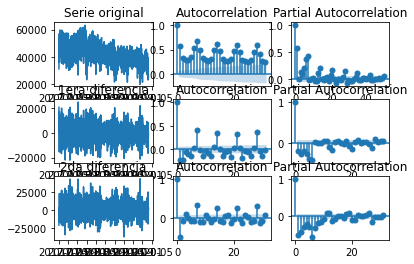

In [84]:
# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(diario_2['cantidad_pasos']); axes[0, 0].set_title('Serie original')
plot_acf(diario_2['cantidad_pasos'], ax=axes[0, 1])
plot_pacf(diario_2['cantidad_pasos'], lags=50, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(diario_2['cantidad_pasos'].diff()); axes[1, 0].set_title('1era diferencia')
plot_acf(diario_2['cantidad_pasos'].diff().dropna(), ax=axes[1, 1])
plot_pacf(diario_2['cantidad_pasos'].diff().dropna(), ax=axes[1, 2])


# 2nd Differencing
axes[2, 0].plot(diario_2['cantidad_pasos'].diff().diff()); axes[2, 0].set_title('2da diferencia')
plot_acf(diario_2['cantidad_pasos'].diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(diario_2['cantidad_pasos'].diff().diff().dropna(), ax=axes[2, 2])

plt.show()

## Machine Learning

### Prophet

La biblioteca Prophet es una biblioteca de código abierto diseñada para realizar pronósticos para conjuntos de datos de series de tiempo univariantes. Es fácil de usar y está diseñado para encontrar automáticamente un buen conjunto de hiperparámetros para el modelo en un esfuerzo por hacer pronósticos hábiles para datos con tendencias y estructura estacional por defecto.

Para usar Prophet para pronosticar, primero, se define y configura un objeto Prophet (), luego se ajusta al conjunto de datos llamando a la función fit () y pasando los datos.

El objeto Prophet () toma argumentos para configurar el tipo de modelo que desea, como el tipo de crecimiento, el tipo de estacionalidad y más. De forma predeterminada, el modelo trabajará duro para resolver casi todo automáticamente.

La función fit () toma un DataFrame de datos de series de tiempo. El DataFrame debe tener un formato específico. La primera columna debe tener el nombre "ds" y contener las fechas y horas. La segunda columna debe tener el nombre "y" y contener las observaciones.

Esto significa que cambiamos los nombres de las columnas en el conjunto de datos. También requiere que la primera columna se convierta en objetos de fecha y hora.

In [90]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [91]:
#se indexa el dataframe diario
diario_2.reset_index(inplace=True,drop=False)
diario_2

,fecha,dia_fecha,hora_inicio,cantidad_pasos
0,2017-01-01,0.0,3033.0,31183.0
1,2017-01-02,0.0,3709.0,51568.0
2,2017-01-03,0.0,3602.0,51093.0
3,2017-01-04,0.0,3828.0,53332.0
4,2017-01-05,0.0,3790.0,56486.0
...,...,...,...,...
1160,2020-03-14,2632.0,2253.0,23052.0
1161,2020-03-16,3136.0,2273.0,31168.0
1162,2020-03-17,3247.0,2271.0,26407.0
1163,2020-03-18,3474.0,2337.0,25106.0


In [92]:
# Conversion y renombre  de los campos para preparar los datos para el modelo: y = cantidad de pasos y ds = fecha
diario_prophet = diario_2
diario_prophet['ds'] = pd.to_datetime(diario_prophet['fecha'])
diario_prophet = diario_prophet.drop(columns=['fecha','dia_fecha','hora_inicio'])
diario_prophet = diario_prophet.rename(columns = {'cantidad_pasos':'y'})
diario_prophet

<ipython-input-92-fb6f0724685c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_prophet['ds'] = pd.to_datetime(diario_prophet['fecha'])


,y,ds
0,31183.0,2017-01-01
1,51568.0,2017-01-02
2,51093.0,2017-01-03
3,53332.0,2017-01-04
4,56486.0,2017-01-05
...,...,...
1160,23052.0,2020-03-14
1161,31168.0,2020-03-16
1162,26407.0,2020-03-17
1163,25106.0,2020-03-18


In [93]:
# cortamos el dataset en un fecha de corte, en este caso hasta diciembre del 2019
split_date_2 = '2019-12-31'
diario_prophet1 = diario_prophet.loc[diario_prophet.ds <= split_date_2].copy()
diario_prophet1

,y,ds
0,31183.0,2017-01-01
1,51568.0,2017-01-02
2,51093.0,2017-01-03
3,53332.0,2017-01-04
4,56486.0,2017-01-05
...,...,...
1082,40182.0,2019-12-27
1083,30681.0,2019-12-28
1084,26259.0,2019-12-29
1085,34523.0,2019-12-30


In [94]:
# definimos el modelo y entrenamos con los datos de hasta noviembre de 2019
m_prop = Prophet(weekly_seasonality=True,
            daily_seasonality=True )
m_prop.fit(diario_prophet1)

In [95]:
#hacemos la predicción 
forecast = m_prop.predict(diario_prophet1)

El resultado de la función predict () es un DataFrame que contiene muchas columnas. Quizás las columnas más importantes son la fecha y hora del pronóstico ('ds'), el valor pronosticado ('yhat') y los límites inferior y superior del valor pronosticado ('yhat_lower' y 'yhat_upper') que proporcionan incertidumbre del pronóstico .

In [96]:
# Predicciones para 180 dias (primeros 6 meses del 2020)
future = m_prop.make_future_dataframe(periods=180)
future.tail

<bound method NDFrame.tail of              ds
0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-04
4    2017-01-05
...         ...
1262 2020-06-24
1263 2020-06-25
1264 2020-06-26
1265 2020-06-27
1266 2020-06-28

[1267 rows x 1 columns]>

In [97]:
#Prediccion en future, a 92 dias, que resulta 3 nuevos atributos
forecast = m_prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,38898.1397,32737.7767,44894.6431
1,2017-01-02,44737.7993,39251.5661,50839.7704
2,2017-01-03,45837.5664,40252.2784,51787.4823
3,2017-01-04,47710.6616,42345.7364,53206.3404
4,2017-01-05,49146.1623,43645.0966,54929.7408
...,...,...,...,...
1262,2020-06-24,34645.8002,28740.7542,40637.4991
1263,2020-06-25,36133.1716,30615.8247,42173.0805
1264,2020-06-26,38281.0647,32171.5998,43555.1171
1265,2020-06-27,30650.4757,24247.0232,36785.6169


El método de predicción asigna a cada fila en el futuro un valor predicho que denomina yhat. Si pasa las fechas históricas, proporcionará un ajuste en la muestra. El objeto de pronóstico aquí es un nuevo marco de datos que incluye una columna yhat con el pronóstico, así como columnas para componentes e intervalos de incertidumbre.

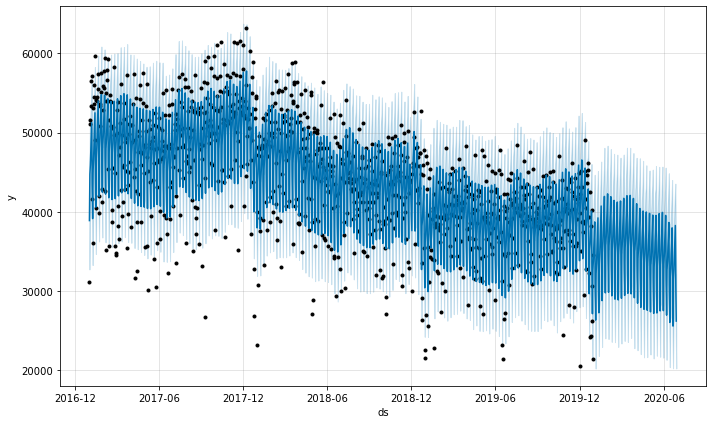

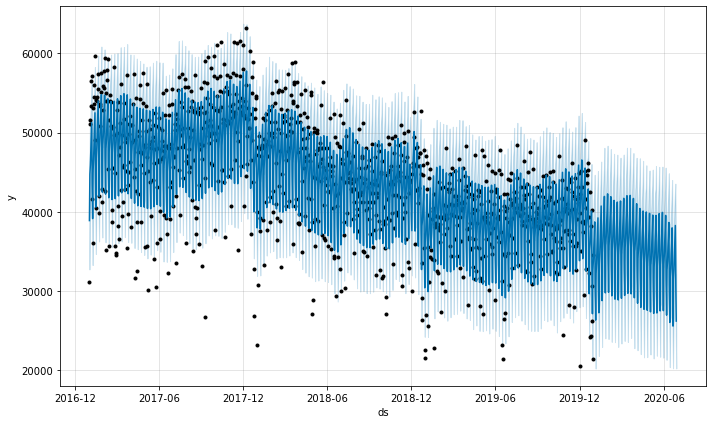

In [98]:
m_prop.plot(forecast)

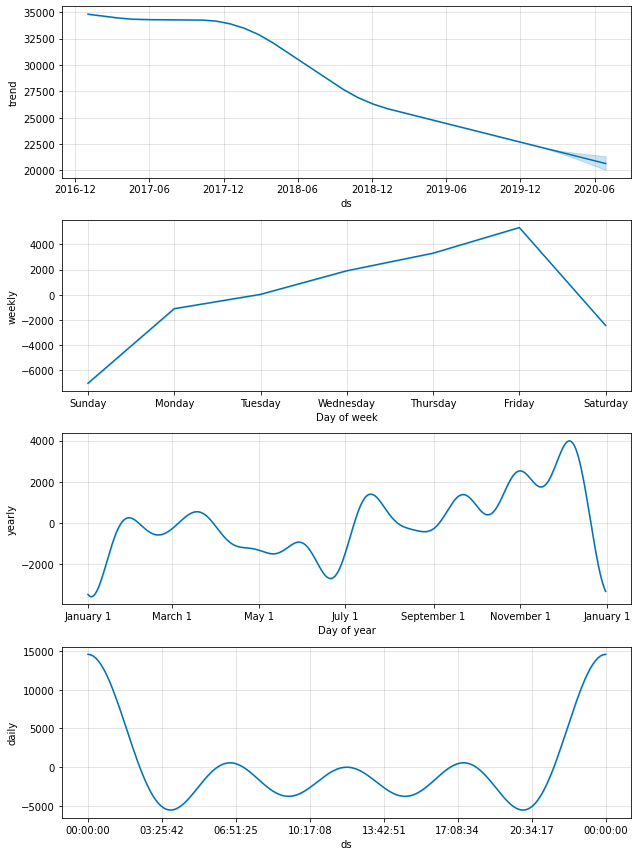

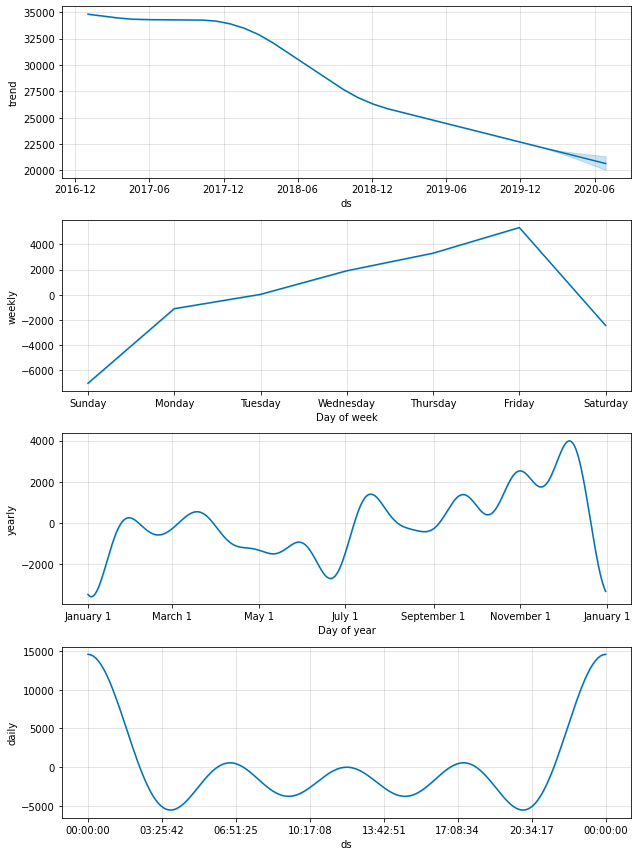

In [99]:
#componentes de la serie y de la prediccion 
m_prop.plot_components(forecast)

In [100]:
y_pred = forecast[['ds', 'yhat']].loc[forecast.ds < split_date_2]
y_pred

,ds,yhat
0,2017-01-01,38898.1397
1,2017-01-02,44737.7993
2,2017-01-03,45837.5664
3,2017-01-04,47710.6616
4,2017-01-05,49146.1623
...,...,...
1081,2019-12-26,38398.8258
1082,2019-12-27,40090.5425
1083,2019-12-28,32013.1004
1084,2019-12-29,27150.9168


In [101]:
y_true = diario_prophet[['ds', 'y']].loc[diario_prophet.ds < split_date_2]
y_true

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
1081,2019-12-26,38168.0
1082,2019-12-27,40182.0
1083,2019-12-28,30681.0
1084,2019-12-29,26259.0


In [184]:
from sklearn.metrics import mean_squared_error

rmse_prophet = np.sqrt(mean_squared_error(y_true.y,y_pred.yhat))
print(f'RMSE de Prophet: {rmse_prophet }')

RMSE de Prophet: 4575.739474522853


### Redes neuronales

El Aprendizaje Profundo utiliza Algoritmos de Redes Neuronales Artificiales que imitan el comportamiento biológico del cerebro.
Hay 3 tipos de Capas de Neuronas: de Entrada, Ocultas y de Salida.
Las conexiones entre neuronas llevan asociadas un peso, que denota la importancia del valor de entrada en esa relación.
Las neuronas aplican una Función de Activación para Estandarizar su valor de salida a la próxima capa de neuronas.
Para entrenar una red neuronal necesitaremos un gran conjunto de datos.
Iterar el conjunto de datos y comparar sus salidas producirá una Función Coste que indicará cuán alejado está nuestra predicción del valor real.
Luego de cada iteración del conjunto de datos de entrada, se ajustarán los pesos de las neuronas utilizando el Descenso de Gradiente para reducir el valor de Coste y acercar las predicciones a las salidas reales.

 https://www.aprendemachinelearning.com/pronostico-de-ventas-redes-neuronales-python-embeddings/

https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/

In [103]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [104]:
diario_2.index

RangeIndex(start=0, stop=1165, step=1)

In [105]:
diario_2

,fecha,dia_fecha,hora_inicio,cantidad_pasos,ds
0,2017-01-01,0.0,3033.0,31183.0,2017-01-01
1,2017-01-02,0.0,3709.0,51568.0,2017-01-02
2,2017-01-03,0.0,3602.0,51093.0,2017-01-03
3,2017-01-04,0.0,3828.0,53332.0,2017-01-04
4,2017-01-05,0.0,3790.0,56486.0,2017-01-05
...,...,...,...,...,...
1160,2020-03-14,2632.0,2253.0,23052.0,2020-03-14
1161,2020-03-16,3136.0,2273.0,31168.0,2020-03-16
1162,2020-03-17,3247.0,2271.0,26407.0,2020-03-17
1163,2020-03-18,3474.0,2337.0,25106.0,2020-03-18


In [131]:
df =  diario_2.drop(columns=['ds','dia_fecha','hora_inicio'])

In [132]:
df

,fecha,cantidad_pasos
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
1160,2020-03-14,23052.0
1161,2020-03-16,31168.0
1162,2020-03-17,26407.0
1163,2020-03-18,25106.0


In [133]:
df.set_index('fecha',inplace=True)

In [134]:
df

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-03-14,23052.0
2020-03-16,31168.0
2020-03-17,26407.0


Train Test Split

In [135]:
len(df)

1165

In [136]:
len(df)-12

1153

In [137]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [138]:
len(test)

12

In [139]:
test

,cantidad_pasos
fecha,
2020-03-07,35531.0
2020-03-08,27796.0
2020-03-09,33823.0
2020-03-10,37960.0
2020-03-11,33290.0
2020-03-12,36730.0
2020-03-13,39548.0
2020-03-14,23052.0
2020-03-16,31168.0


#### LSTM

LSTM (Long Short-Term Memory network) es un tipo de red neuronal recurrente capaz de recordar la información pasada y, al predecir los valores futuros, tiene en cuenta esta información pasada.

Las LSTMs son sensibles a la escala de los datos de entrada, especialmente cuando se utilizan las funciones de activación sigmoide (por defecto) o tanh. Puede ser una buena práctica reescalar los datos al rango de 0 a 1, también llamado normalización. Podemos normalizar fácilmente el conjunto de datos utilizando la clase de preprocesamiento MinMaxScaler de la biblioteca scikit-learn.

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
# normalizacion de los datos
scaler = MinMaxScaler(feature_range=(0,1))

In [142]:
scaler.fit(train)

MinMaxScaler()

In [143]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [144]:
scaled_test

array([[0.35181096],
       [0.17012731],
       [0.31169258],
       [0.40886457],
       [0.2991732 ],
       [0.37997369],
       [0.44616433],
       [0.0586978 ],
       [0.24933058],
       [0.13750176],
       [0.1069432 ],
       [0.10854042]])

In [145]:
scaled_train

array([[0.24968291],
       [0.72849627],
       [0.71733922],
       ...,
       [0.40104289],
       [0.45325786],
       [0.51987128]])

### Time series generator

Los datos de series de tiempo requieren preparación antes de que puedan usarse para entrenar un modelo de aprendizaje supervisado, como un modelo de aprendizaje profundo.
Una serie de tiempo debe transformarse en muestras con componentes de entrada y salida. La transformación informa lo que aprenderá el modelo y cómo piensa usar el modelo en el futuro al hacer predicciones, p. qué se requiere para hacer una predicción (X) y qué predicción se hace (y)

Keras proporciona TimeseriesGenerator que se puede utilizar para transformar automáticamente un conjunto de datos de series de tiempo univariante o multivariante en un problema de aprendizaje supervisado.

Hay dos partes para usar TimeseriesGenerator: definirlo y usarlo para entrenar modelos.

Definición de un generador de series temporales
Puede crear una instancia de la clase y especificar los aspectos de entrada y salida de su problema de serie temporal y proporcionará una instancia de una clase Sequence que luego se puede usar para iterar a través de las entradas y salidas de la serie.

In [147]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [148]:
# Definimos el generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [149]:
len(generator) # n_input = 7

1146

In [159]:
X,y = generator[0]

### Modelo

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Primero creamos un modelo vacío de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”

La arquitectura de la red neuronal será:

1. Entrada 7 inputs
2. 1 capa oculta con 7 neuronas 
3. La salida será 1 sola neurona
4. Como función de activación utilizamos función de activación lineal (relu)
5. Utilizaremos como optimizador Adam y métrica de pérdida (loss) Mean Absolute Error
6. Como la predicción será un valor continuo y no discreto, para calcular el Acuracy utilizaremos Mean Squared Error y para saber si mejora con el entrenamiento se debería ir reduciendo con las EPOCHS.

In [151]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [152]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [153]:
# fit model
model.fit_generator(generator,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0231A: 0s - loss: 0.
Epoch 2/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0176
Epoch 3/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0156
Epoch 4/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0156
Epoch 5/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0153A: 0s -
Epoch 6/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0151
Epoch 7/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0148
Epoch 8/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0148
Epoch 9/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0148
Epoch 10/50
1146/1146 [==============================] - 2s 1ms/step - loss: 0.0147
Epoch 11/50
1146/1146 [==============================] - 1s 1ms/step - loss: 0.0142A: 0s 
Epoch 12/50
1146/1146 [==============================] -

In [154]:
model.history.history.keys()

dict_keys(['loss'])

Keras proporciona la capacidad de registrar devoluciones de llamada al entrenar un modelo de aprendizaje profundo.

Una de las devoluciones de llamada predeterminadas que se registra al entrenar todos los modelos de aprendizaje profundo es la devolución de llamada del historial. Registra métricas de entrenamiento para cada época. Esto incluye la pérdida y la precisión (para problemas de clasificación), así como la pérdida y precisión del conjunto de datos de validación, si se establece uno.

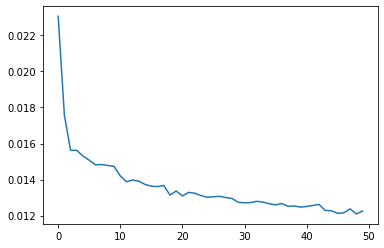

In [155]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se observa como el MSE va disminuyendo con las épocas

In [ ]:
plot_validate(model, 'acc', epoch)

Evaluando en los Datos de Prueba (Test)

In [156]:
# 7 dias de historia ---> predecir el 8
# Necesitaremos los últimos 7 dias del conjunto de entrenamiento para predecir los 7 dias en test
first_eval_batch = scaled_train[-7:]

In [157]:
first_eval_batch

array([[0.34988491],
       [0.14924602],
       [0.34358998],
       [0.36844083],
       [0.40104289],
       [0.45325786],
       [0.51987128]])

In [160]:
X.shape

(1, 7, 1)

In [161]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [162]:
first_eval_batch.shape

(1, 7, 1)

In [163]:
model.predict(first_eval_batch)

array([[0.4143776]], dtype=float32)

In [164]:
scaled_test

array([[0.35181096],
       [0.17012731],
       [0.31169258],
       [0.40886457],
       [0.2991732 ],
       [0.37997369],
       [0.44616433],
       [0.0586978 ],
       [0.24933058],
       [0.13750176],
       [0.1069432 ],
       [0.10854042]])

### Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba

In [165]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [166]:
test_predictions

[array([0.4143776], dtype=float32),
 array([0.33986574], dtype=float32),
 array([0.3987765], dtype=float32),
 array([0.4247971], dtype=float32),
 array([0.44378316], dtype=float32),
 array([0.4655652], dtype=float32),
 array([0.47501725], dtype=float32),
 array([0.42399263], dtype=float32),
 array([0.39587802], dtype=float32),
 array([0.42841506], dtype=float32),
 array([0.44591686], dtype=float32),
 array([0.45775127], dtype=float32)]

In [167]:
scaled_test

array([[0.35181096],
       [0.17012731],
       [0.31169258],
       [0.40886457],
       [0.2991732 ],
       [0.37997369],
       [0.44616433],
       [0.0586978 ],
       [0.24933058],
       [0.13750176],
       [0.1069432 ],
       [0.10854042]])

### Transformación inversa y Comparación

In [168]:
true_predictions = scaler.inverse_transform(test_predictions)

In [169]:
true_predictions

array([[38194.71194047],
       [35022.44418991],
       [37530.51077133],
       [38638.31122059],
       [39446.62442517],
       [40373.97302151],
       [40776.3843838 ],
       [38604.06239223],
       [37407.11069357],
       [38792.34276628],
       [39537.4644528 ],
       [40041.30274391]])

In [170]:
test

,cantidad_pasos
fecha,
2020-03-07,35531.0
2020-03-08,27796.0
2020-03-09,33823.0
2020-03-10,37960.0
2020-03-11,33290.0
2020-03-12,36730.0
2020-03-13,39548.0
2020-03-14,23052.0
2020-03-16,31168.0


In [171]:
test['Predictions'] = true_predictions

<ipython-input-171-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [173]:
test

,cantidad_pasos,Predictions
fecha,,
2020-03-07,35531.0,38194.7119
2020-03-08,27796.0,35022.4442
2020-03-09,33823.0,37530.5108
2020-03-10,37960.0,38638.3112
2020-03-11,33290.0,39446.6244
2020-03-12,36730.0,40373.9730
2020-03-13,39548.0,40776.3844
2020-03-14,23052.0,38604.0624
2020-03-16,31168.0,37407.1107


<AxesSubplot:xlabel='fecha'>

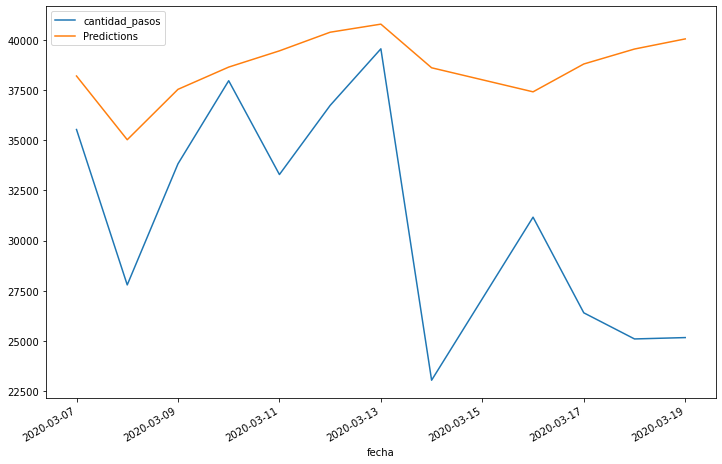

In [174]:
test.plot(figsize=(12,8))

Se observa el gráfico, donde se muestra los valores predichos por la red y el valor real para un periodo de 7 días. 

In [185]:
import math
# calculamos el error rmse en Test
testScore = math.sqrt(mean_squared_error(test.cantidad_pasos,true_predictions))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del test: 9081.61 RMSE


Para mejorar el desempeño de la red podemos probar cambiar la arquitectura y la cantidad de épocas.  
podemos aumentar la cantidad de neuronas de entrada, la capa oculta y aumentar a 100 la cantidad de épocas.

### Comparación de resultados
RMSE Prophet: 4575.739474522853

RMSE LSTM test: 9081.61 

De acuerdo a los resultados obtenidos se observa que el modelo utilizando la libreria prophet hizo una mejor predicción de la cantidad de pasos del peaje Illia. La red neuronal posiblemente mejorará sus resultados si optimizamos sus hiperparametros. 